In [ ]:
"""
Hakan Güldal, hguldal@trakya.edu.tr, hguldal@gmail.com, 2024
Decision Tree Analysis

Hardware Infrastructure: Google Compute Engine backend (GPU) System RAM: 51.0 GB NVidia T4 GPU
Software Infrastructure: Python, Scikit-Learn, Pandas, Seaborn, Matplotlib Libraries

"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis parameters
analysisParameters={
    'UnderSampling':True,
    'DataPath':'data.csv'
}

# Read the CSV data file
df = pd.read_csv(analysisParameters['DataPath'])

# Select the noncognitive variables in the data that have the highest information gain value in the previous analysis.
df=df[['ESCS','HOMEPOS','MATHEFF','MS2_LEV']]

# Remove missing data
df=df.dropna()


In [ ]:
# Noncognitive variables
featureList=['ESCS','HOMEPOS','MATHEFF']


# Dependent variable
classLabel='MS2_LEV'

X=df[featureList]
y=df[[classLabel]]

# Convert numeric values ​​in dependent variable to text
y=y.replace({'MS2_LEV': {1: 'Low', 3: 'High'}})

y.value_counts()
print(y.value_counts())

if analysisParameters['UnderSampling']==True:

  from imblearn.under_sampling import NearMiss

  # Apply NearMiss
  nm = NearMiss(version=1)
  X, y = nm.fit_resample(X, y)

  # Show values
  print(y.value_counts())



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Identify training and testing partitions in the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree Classifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Train the model
clf_en.fit(X_train, y_train)

# Predict the dependent variable
y_pred_en = clf_en.predict(X_test)


              precision    recall  f1-score   support

        High       0.70      0.69      0.69     14938
         Low       0.70      0.71      0.70     15040

    accuracy                           0.70     29978
   macro avg       0.70      0.70      0.70     29978
weighted avg       0.70      0.70      0.70     29978

MCC: 0.3996348878602079


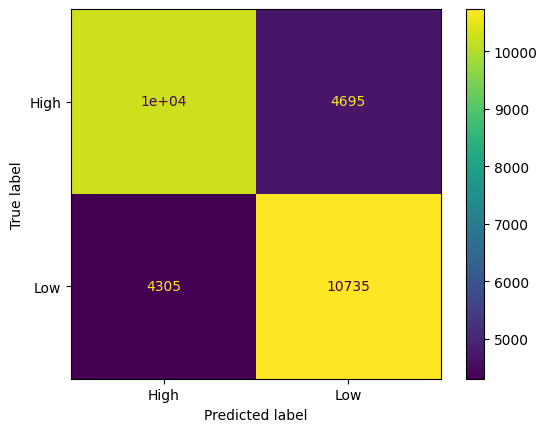

In [ ]:
from sklearn.metrics import classification_report,matthews_corrcoef,confusion_matrix,ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Show the results of the analysis

print(classification_report(y_test, y_pred_en))

print('MCC:',matthews_corrcoef(y_test, y_pred_en))

# Create confusion matrix of the model

cMatrix=confusion_matrix(y_test, y_pred_en)

# Show the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cMatrix,display_labels=clf_en.classes_)

disp.plot()
plt.show()

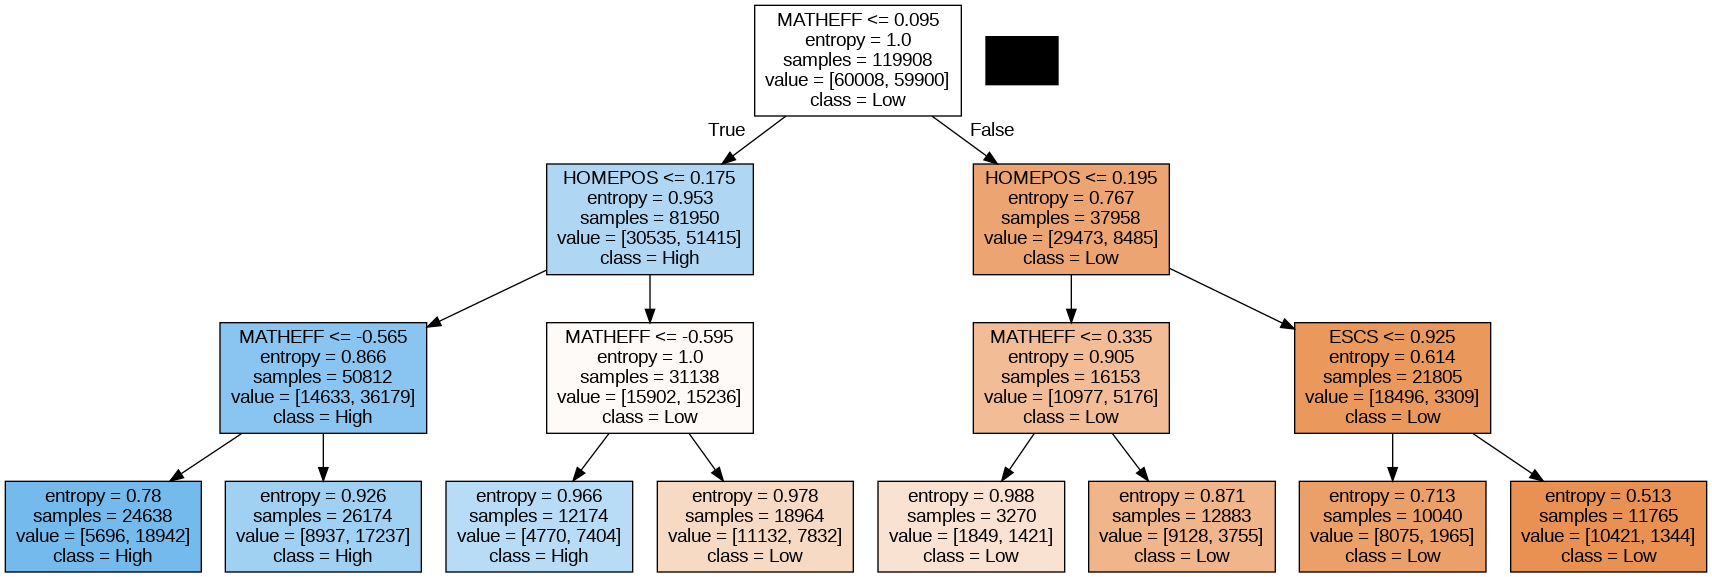

In [ ]:
import graphviz
from sklearn import tree

feature_names=['ESCS','HOMEPOS','MATHEFF']
class_names=['Low','High']

# Plot decision tree of the model
dot_data = tree.export_graphviz(clf_en, out_file=None, feature_names=feature_names,class_names=class_names,filled=True)

import pydotplus
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
